In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from wordcloud import WordCloud, STOPWORDS
import sqlite3
import numpy as np

# visualization:
from Vis_func import *


# Exploratory data analysis

In [2]:
cnx = sqlite3.connect('KinoPoisk.db')
df = pd.read_sql_query("SELECT * FROM films_data", cnx)
df = df.fillna(value=np.nan)

In [14]:
num_columns = ['Сборы в мире', 'Сборы в США', 'Оценка фильма']
for col in num_columns:
    df[col] = pd.to_numeric(df[col])
df['Год производства'] = pd.to_numeric(df['Год производства'], downcast="integer")


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Год производства   250 non-null    int16  
 1   Страна             250 non-null    object 
 2   Жанр               250 non-null    object 
 3   Слоган             250 non-null    object 
 4   Режиссер           250 non-null    object 
 5   Сценарий           250 non-null    object 
 6   Продюсер           199 non-null    object 
 7   Оператор           215 non-null    object 
 8   Композитор         250 non-null    object 
 9   Художник           248 non-null    object 
 10  Монтаж             247 non-null    object 
 11  Бюджет             189 non-null    float64
 12  Сборы в США        179 non-null    float64
 13  Сборы в мире       188 non-null    float64
 14  Зрители            250 non-null    int64  
 15  Премьера в Росcии  173 non-null    object 
 16  Премьера в мире    245 non

In [16]:
pd.set_option('display.max_columns', None)
df.head(5)

,Год производства,Страна,Жанр,Слоган,Режиссер,Сценарий,Продюсер,Оператор,Композитор,Художник,Монтаж,Бюджет,Сборы в США,Сборы в мире,Зрители,Премьера в Росcии,Премьера в мире,Релиз на DVD,Возраст,Рейтинг MPAA,Время,Название фильма,Актеры,Оценка фильма
0,1999,США,"драма, фэнтези, криминал",«Пол Эджкомб не верил в чудеса. Пока не столкн...,Фрэнк Дарабонт,"Фрэнк Дарабонт, Стивен Кинг","Фрэнк Дарабонт, Дэвид Валдес",Дэвид Тэттерсолл,Томас Ньюман,"Теренс Марш, Уильям Крус, Керин Вагнер, ...",Ричард Фрэнсис-Брюс,60000000.0,136801374.0,286801374.0,26000000,"18 апреля 2000, «West»","6 декабря 1999, ...","13 февраля 2001, «West Video»",16+,R,189 мин. / 03:09,Зеленая миля (1999)The Green Mile16+,Том ХэнксДэвид МорсБонни ХантМайкл Кларк Дунка...,9.1
1,1993,США,"драма, биография, история, военный",«Этот список - жизнь»,Стивен Спилберг,"Стивен Зеллиан, Томас Кенилли","Ирвинг Гловин, Кэтлин Кеннеди, Бранко Лустиг, ...",Януш Камински,Джон Уильямс,"Аллан Старски, Анна Б. Шеппард",Майкл Кан,22000000.0,96065768.0,321306305.0,23000000,"21 мая 1994, «Ист-Вест»","30 ноября 1993, ...","28 сентября 2004, «Premier Digital»",16+,R,195 мин. / 03:15,Список Шиндлера (1993)Schindler's List16+,Лиам НисонБен КингслиРэйф ФайнсКэролайн Гудолл...,8.8
2,1994,США,драма,«Страх - это кандалы. Надежда - это свобода»,Фрэнк Дарабонт,"Фрэнк Дарабонт, Стивен Кинг","Лиз Глоцер, Дэвид В. Лестер, Ники Марвин",Роджер Дикинс,Томас Ньюман,"Теренс Марш, Питер Лэндсдаун Смит, Элизабет Ма...",Ричард Фрэнсис-Брюс,25000000.0,28341469.0,28418687.0,6700000,"24 октября 2019, «Иноекино»","10 сентября 1994, ...","1 сентября 1999, «Videogram»",16+,R,142 мин. / 02:22,Побег из Шоушенка (1994)The Shawshank Redempti...,Тим РоббинсМорган ФриманБоб ГантонУильям Сэдле...,9.1
3,1994,США,"драма, комедия, мелодрама, история, военный","«Мир уже никогда не будет прежним, после того ...",Роберт Земекис,"Эрик Рот, Уинстон Грум","Венди Файнерман, Чарльз Невирт, Стив Старки, ...",Дон Бёрджесс,Алан Сильвестри,"Рик Картер, Лесли МакДональд, Уильям Джеймс Ти...",Артур Шмидт,55000000.0,329694499.0,677387716.0,78500000,"13 февраля 2020, «Иноекино»","23 июня 1994, ...","1 декабря 2009, «Юниверсал Пикчерс Рус»",16+,PG-13,142 мин. / 02:22,Форрест Гамп (1994)Forrest Gump16+,Том ХэнксРобин РайтСалли ФилдГэри СинизМайкелт...,8.9
4,2017,США,"мультфильм, фэнтези, комедия, приключения, сем...",«The celebration of a lifetime»,"Ли Анкрич, Эдриан Молина","Ли Анкрич, Джейсон Кац, Мэттью Олдрич, ...","Дарла К. Андерсон, Мэри Элис Драмм, Джон Лассетер",NaN,Майкл Джаккино,"Харли Джессуп, Берт Берри, Тим Эватт, ...","Стив Блум, Ли Анкрич",175000000.0,209726015.0,807082196.0,0,"23 ноября 2017, «WDSSPR»","20 октября 2017, ...","20 марта 2018, «Уолт Дисней Компани СНГ»",12+,PG,105 мин. / 01:45,Тайна Коко (2017)Coco12+,Энтони ГонсалесГаэль Гарсиа БернальБенджамин Б...,8.7


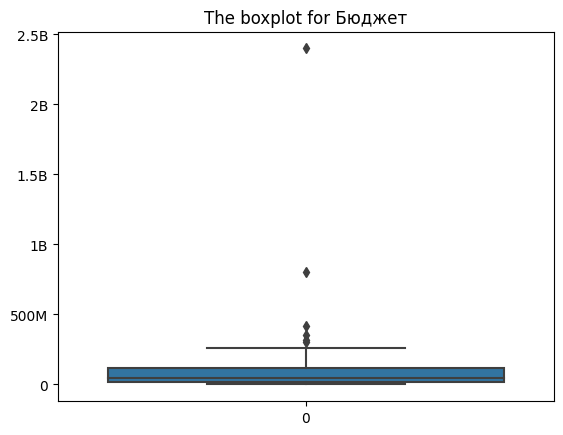

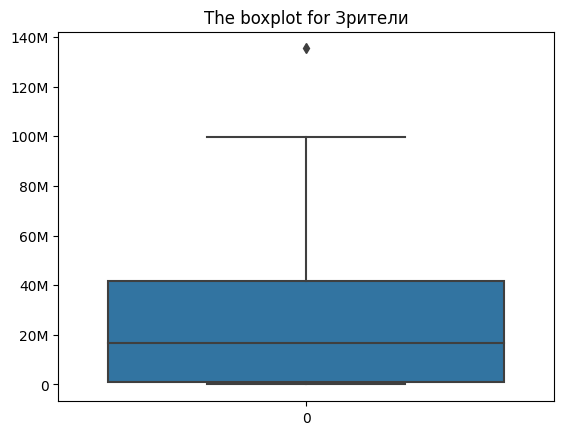

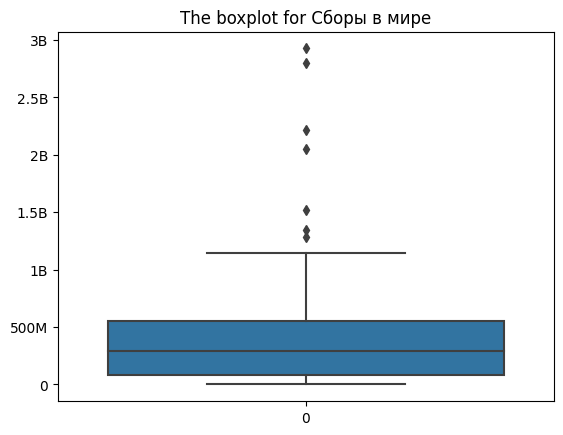

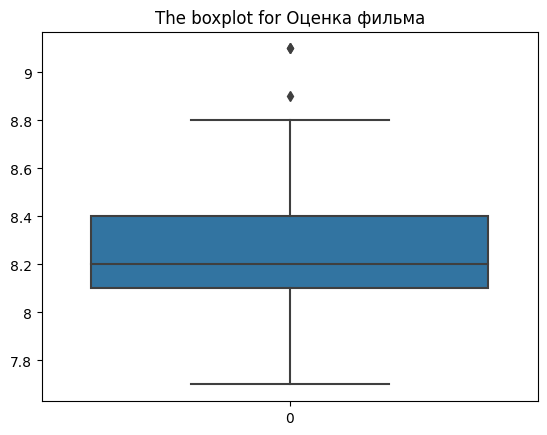

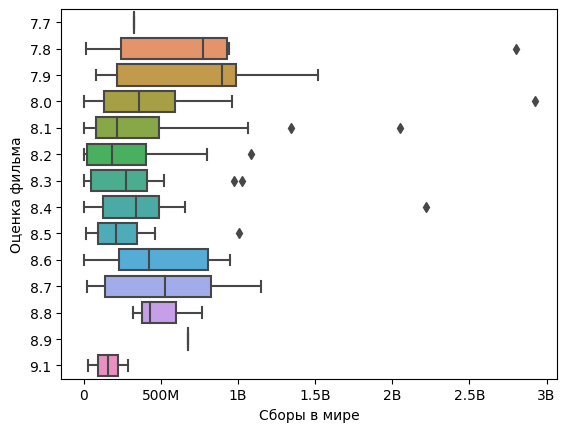

In [17]:
numeric_cols = ['Бюджет', 'Зрители', 'Сборы в мире', 'Оценка фильма']
for col in numeric_cols:
    sns.boxplot(df[col])
    ax = plt.gca()
    ax.yaxis.set_major_formatter(
        tick.FuncFormatter(reformat_large_tick_values))
    plt.title(f'The boxplot for {col}')
    plt.show()

sns.boxplot(x=df['Сборы в мире'],
            y=df['Оценка фильма'],
            orient='h')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()


## Part 2: Visualization

#### Histograms

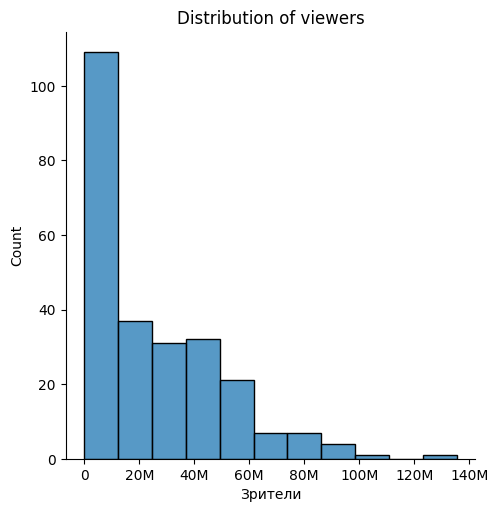

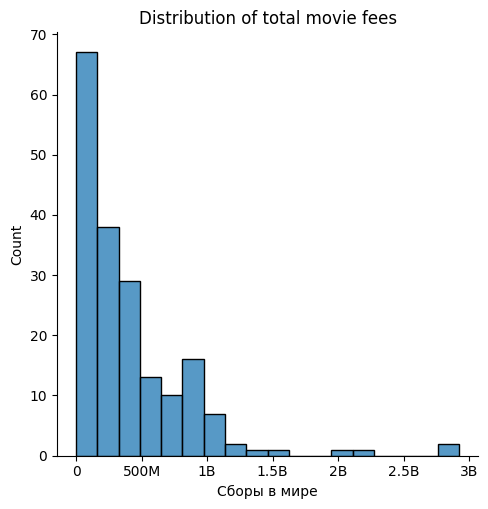

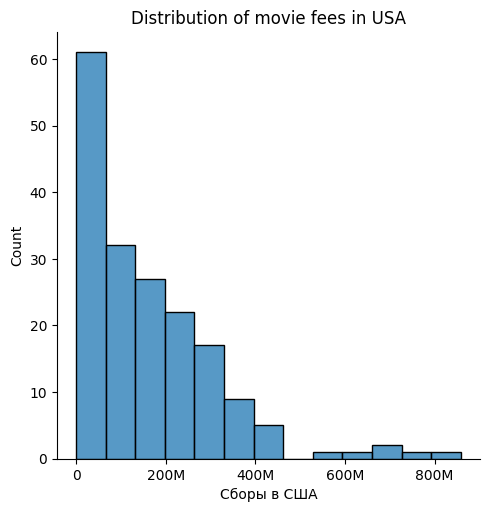

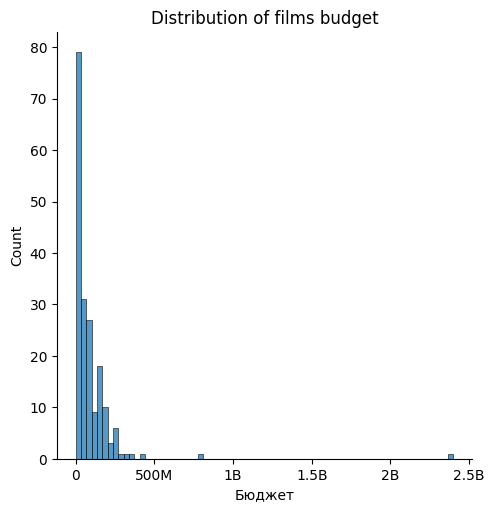

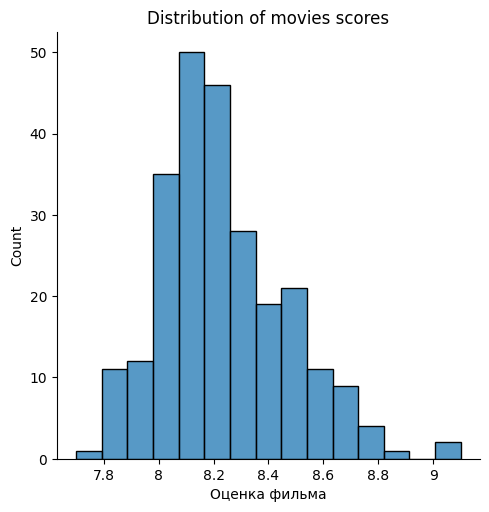

In [18]:
cols = ['Зрители', 'Сборы в мире', 'Сборы в США', 'Бюджет', 'Оценка фильма']
titles = ['Distribution of viewers', 'Distribution of total movie fees',
          'Distribution of movie fees in USA', 'Distribution of films budget', 'Distribution of movies scores']
for col in cols:
    sns.displot(df[col])
    plt.title(titles[cols.index(col)])
    ax = plt.gca()
    ax.xaxis.set_major_formatter(
        tick.FuncFormatter(reformat_large_tick_values))
    plt.show()


### Word cloud

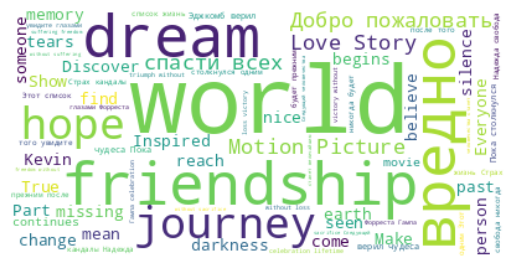

In [19]:
text = " ".join(review for review in df['Слоган'])

stopwords = set(STOPWORDS)
stopwords.update(["Beyond", "will", 'может'])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      min_word_length=4,
                      collocation_threshold=10).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## The below graphs should be created in dashboard

#### Time-series plots

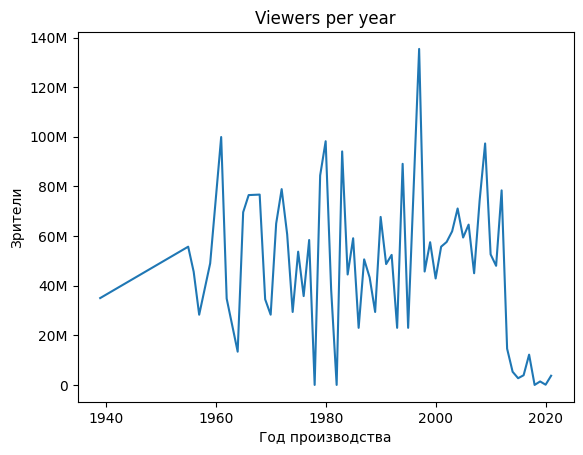

In [25]:
viewers_per_year = df.groupby('Год производства')['Зрители'].max()
sns.lineplot(viewers_per_year)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.title('Viewers per year')
plt.show()


### Categorical analysis

#### Genre

In [26]:
count_plot(df=df,
           name_of_category_column='Жанр',
           title_name='Количество фильмов каждого жанра').show()

bar_plot(df=df,
         name_of_category_column='Жанр',
         name_of_measerment_column='Сборы в мире',
         title_name='Средние сборы фильма по жанрам в долларах').show()

bar_plot(df=df,
         name_of_category_column='Жанр',
         name_of_measerment_column='Сборы в США',
         title_name='Средние сборы фильма в США по жанрам в долларах').show()

bar_plot(df=df,
         name_of_category_column='Жанр',
         name_of_measerment_column='Зрители',
         title_name='Среднее кол-во зрителей фильма по жанрам').show()

bar_plot(df=df,
         name_of_category_column='Жанр',
         name_of_measerment_column='Оценка фильма',
         title_name='Средняя оценка фильма по жанрам',
         scale_of_axis=[8, 8.5]).show()


#### Country

In [27]:
count_plot(df=df, name_of_category_column='Страна',
           title_name='Кол-во фильмов по странам производства').show()
bar_plot(df=df, name_of_category_column='Страна', name_of_measerment_column='Сборы в мире',
         title_name='Средние сборы фильма в мире по странам производства').show()
bar_plot(df=df, name_of_category_column='Страна', name_of_measerment_column='Сборы в США',
         title_name='Средние сборы фильма в США по странам производства').show()
bar_plot(df=df, name_of_category_column='Страна', name_of_measerment_column='Зрители',
         title_name='Среднее кол-во зрителей по странам производства').show()
bar_plot(df=df, name_of_category_column='Страна', name_of_measerment_column='Оценка фильма',
         title_name='Средняя оценка фильмов по странам производства', scale_of_axis=[7.8, 8.7]).show()


#### Producer

#### Screenwriter

#### Actors